The following line installs pyspedas, so this notebook can be used in Google Colab.  If you're running in an environment where pyspedas is already installed, you can comment out or skip this command.

In [ ]:
!pip install pyspedas

The following line may also be needed in Google Colab, to pick up newly installed packages.  

In [2]:
exit()

In [28]:
import pyspedas

In [29]:
from pyspedas.cluster.load_csa import load_csa

In [30]:
load_csa(datatypes=['CP_CIS-HIA_PAD_HS_MAG_IONS_PF'])

23-Jan-23 17:38:29: Downloading Cluster data, please wait....
23-Jan-23 17:38:48: Download complete.
23-Jan-23 17:38:49: Time clip returns full data set.
23-Jan-23 17:38:49: Time clip returns full data set.
23-Jan-23 17:38:49: Time clip returns full data set.
23-Jan-23 17:38:49: Time clip returns full data set.


['duration__C1_CP_CIS_HIA_PAD_HS_MAG_IONS_PF',
 'cis_mode__C1_CP_CIS_HIA_PAD_HS_MAG_IONS_PF',
 'tm_product__C1_CP_CIS_HIA_PAD_HS_MAG_IONS_PF',
 'Differential_Particle_Flux__C1_CP_CIS_HIA_PAD_HS_MAG_IONS_PF']

In [31]:
from pytplot import get_data, store_data, options, tplot

In [32]:
data = get_data('Differential_Particle_Flux__C1_CP_CIS_HIA_PAD_HS_MAG_IONS_PF')
metadata = get_data('Differential_Particle_Flux__C1_CP_CIS_HIA_PAD_HS_MAG_IONS_PF', metadata=True)

In [33]:
metadata['CDF']['VATT']

{'CATDESC': 'Differential_Particle_Flux',
 'FIELDNAM': 'Differential_Particle_Flux',
 'UNITS': 'Particles cm^-2 s^-1 sr^-1 Kev^-1',
 'SI_conversion': '6.2415E+19>(particles) m^-2 s^-1 sr^-1 J^-1',
 'LABLAXIS': 'Differential_Particle_Flux',
 'FILLVAL': -1e+31,
 'VALIDMIN': 0.0,
 'VALIDMAX': 1308900000.0,
 'FORMAT': 'F11',
 'VAR_TYPE': 'data',
 'sig_digits': 5,
 'DEPEND_0': 'time_tags__C1_CP_CIS_HIA_PAD_HS_MAG_IONS_PF',
 'QUALITY': 3,
 'ENTITY': 'Ion',
 'PROPERTY': 'Differential_Particle_Flux',
 'DEPEND_1': 'pitch_angle__C1_CP_CIS_HIA_PAD_HS_MAG_IONS_PF',
 'DEPEND_2': 'energy_table__C1_CP_CIS_HIA_PAD_HS_MAG_IONS_PF',
 'DISPLAY_TYPE': 'spectrogram',
 'LABL_PTR_1': 'Metadata_pitch_angle__C1_CP_CIS_HIA_PAD_HS_MAG_IONS_PF',
 'LABL_PTR_2': 'Metadata_energy_table__C1_CP_CIS_HIA_PAD_HS_MAG_IONS_PF'}

So the pitch angles are:

In [34]:
data.v1

array([  5.625,  16.875,  28.125,  39.375,  50.625,  61.875,  73.125,
        84.375,  95.625, 106.875, 118.125, 129.375, 140.625, 151.875,
       163.125, 174.375], dtype=float32)

And the energies are:

In [35]:
data.v2

array([2.889833e+04, 2.172822e+04, 1.633712e+04, 1.228363e+04,
       9.235880e+03, 6.944320e+03, 5.221330e+03, 3.925840e+03,
       2.951780e+03, 2.219400e+03, 1.668730e+03, 1.254690e+03,
       9.433900e+02, 7.093200e+02, 5.333200e+02, 4.010000e+02,
       3.015000e+02, 2.267000e+02, 1.704500e+02, 1.281600e+02,
       9.636000e+01, 7.245000e+01, 5.448000e+01, 4.096000e+01,
       3.080000e+01, 2.316000e+01, 1.741000e+01, 1.309000e+01,
       9.840000e+00, 7.400000e+00, 5.560000e+00], dtype=float32)

In [36]:
data.y.shape

(4482, 16, 31)

Create time vs. energy by summing over the pitch angle dimension:

In [37]:
import numpy as np

en_flux = np.nansum(data.y, axis=1)

en_flux.shape

(4482, 31)

In [38]:
store_data('diff_part_flux', data={'x': data.times,
                                   'y': en_flux,
                                   'v': data.v2})

True

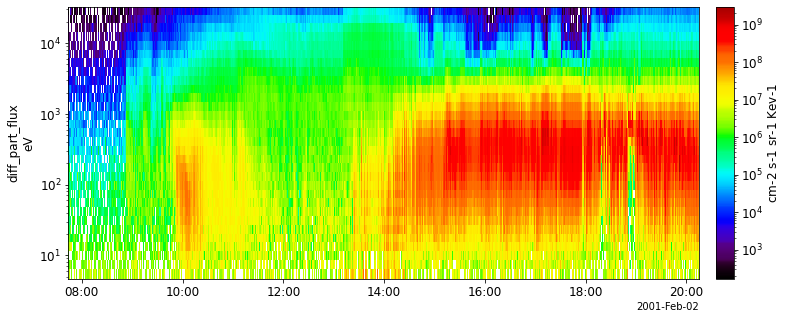

In [43]:
options('diff_part_flux', 'spec', True)
options('diff_part_flux', 'ylog', True)
options('diff_part_flux', 'zlog', True)
options('diff_part_flux', 'ztitle', 'cm^-2 s^-1 sr^-1 Kev^-1')

tplot('diff_part_flux')

Create pitch angle distribution:

In [40]:
pa_flux = np.nansum(data.y, axis=2)

pa_flux.shape

(4482, 16)

In [41]:
store_data('diff_part_flux_pa', data={'x': data.times,
                                      'y': pa_flux,
                                      'v': data.v1})

True

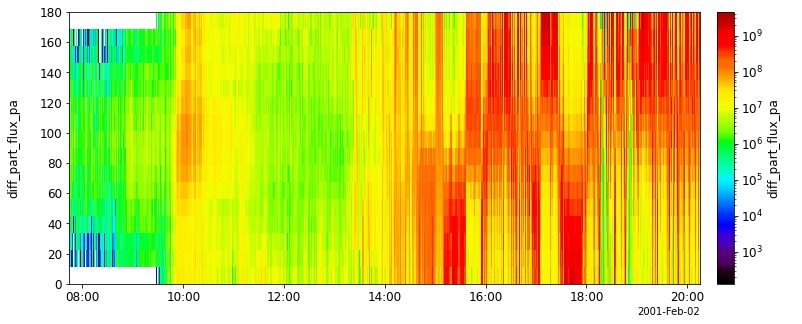

In [42]:
options('diff_part_flux_pa', 'spec', True)
options('diff_part_flux_pa', 'zlog', True)

tplot('diff_part_flux_pa')